# The Fisher-Wright Model

The notebook explores the Fisher-Wright (or Wright-Fisher) Model describing evolution in a sexual population.  Sexual reproduction plays a subtle role of decoupling traits at different parts of the genome.  This allows us to consider each trait separately.  We will model a realistic genome at the end of this tutorial to demonstrate that this assumption is a good model of reality.

We assume we have a population of fixed size $P$ that evolves from one generation to the next.  We assume that there are two types of individuals: those with trait $A$ and those with trait $B$.  We assume $B$ is fitter (produce more offspring).  Let $n(t)$ be the number of individuals of type $B$ at generation $t$.  At each generation the following happens:
1. Individuals produce a large number of seeds.  For each seed the $A$ type produces the $B$ type produces $1+s$ seeds so that the proportion of seeds produced by type $B$ is
$$p_s(t) = \frac{(1+s)\,n(t)}{P-n(t)+(1+s)\,n(t)} = \frac{(1+s)\,n(t)}{P+s\,n(t)}$$
2. The seeds however contain mutations
- $A\rightarrow B$ with probability $u$
- $B\rightarrow A$ with probability $v$

so the proportion of seeds of type $B$ are
$$p_{sm} = (1-v)\,p_s + u \,(1-p_s)$$
3. From the seeds a new generation of size $P$ is produced.  The probability that the number of type $B$ individuals, $n(t+1)$, is equal to $n'$ is given by the binomial distribution
$$\mathbb{P}\!\left(\strut n(t+1)=n'\right) = \binom{P}{n'} p_{sm}^{n'} \, (1-p_{sm})^{p-n'}$$

The peculiar thing is that sexual reproduction doesn't seem to play a role.  However, when we have a large number of traits without sexual reproduction the traits are linked together (something known as linkage).  Sexual reproduction causes sufficient mixing that we can treat the traits separately.  We have assumed are individuals are haploids.  For diploids the model is slightly more complicated, although the major difference is the population size doubles.

## Task 1: Simulating Fisher-Wright

Write a program to simulate the Fisher-Wright model of evolution.  (To make it easy you can just copy the code below).

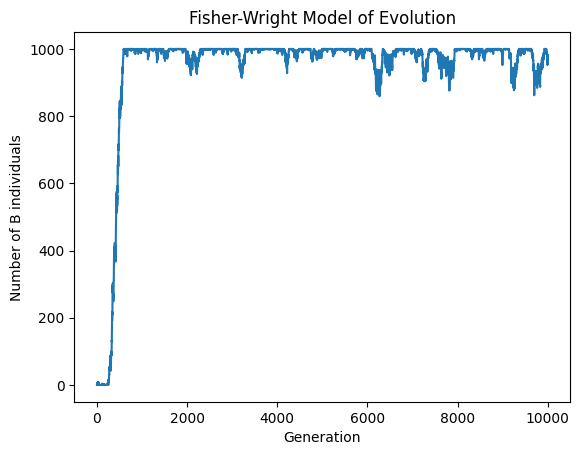

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.special import comb

class FisherWright:
    def __init__(self, population_size, s, u, v):
        self.population_size = population_size
        self.s = s
        self.u = u
        self.v = v

    def next_generation(self, n):
        ps = (1 + self.s) * n / (self.population_size + self.s * n)
        psm = (1 - self.v) * ps + self.u * (1 - ps)

        next_n = np.random.binomial(self.population_size, psm)
        return next_n

    def simulate(self, initial_n, generations):
        n_values = [initial_n]
        for _ in range(generations):
            next_n = self.next_generation(n_values[-1])
            n_values.append(next_n)
        return n_values
    
    def __call__(self, initial_n):
        n = initial_n
        while True:
            n = self.next_generation(n)
            yield n


population_size = 1000
s = 0.01
u = 0.0001
v = 0.0001
generations = 10000
initial_n = 0

model = FisherWright(population_size, s, u, v)
n_values = model.simulate(initial_n, generations)


plt.plot(n_values)
plt.xlabel('Generation')
plt.ylabel('Number of B individuals')
plt.title('Fisher-Wright Model of Evolution')
plt.show()

### Questions

1. Under what conditions does trait $B$ take over the population
2. Define the take-over time as the first time when $n(t) = 0.95 P$
    - Plot a graph of how the take-over time depends on the selection strength $s$ (assume $P=10000$ and $u=v=0.0001$)
    - Plot a graph of how the take-over time depends on the mutation rate $u=v=m$ (assuming $P=10000$ and $s=0.01$)
    - Plot a graph of how the take-over time depends on the population size $P$ (assuming $s=0.01$ and $u=v=0.0001$)

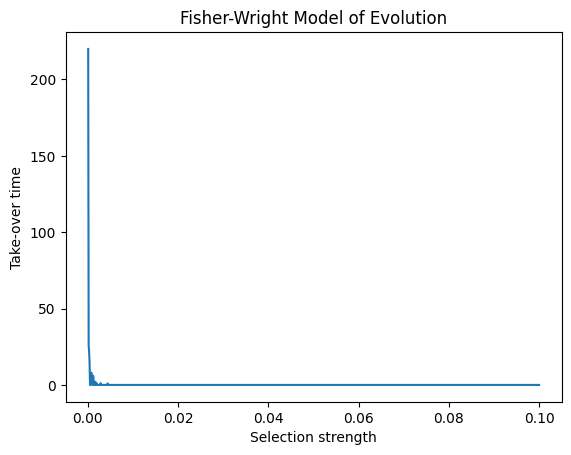

In [3]:
#  the take-over time as the first time when $n(t) = 0.95 P$

def cal_take_over_time(population_size, s, u, v):
    model = FisherWright(population_size, s, u, v)
    for initial_n in range(population_size):
        n_values = model.simulate(initial_n, generations)
        if n_values[-1] >= 0.95 * population_size:
            return initial_n
        
    return None

# Plot a graph of how the take-over time depends on the selection strength $s$ (assume $P=10000$ and $u=v=0.0001$)
 
population_size = 10000
u = 0.0001
v = 0.0001
generations = 10000
 
s_values = np.linspace(0.0001, 0.1, 1000)
take_over_times = [cal_take_over_time(population_size, s, u, v) for s in s_values]

plt.plot(s_values, take_over_times)
plt.xlabel('Selection strength')
plt.ylabel('Take-over time')
plt.title('Fisher-Wright Model of Evolution')
plt.show()


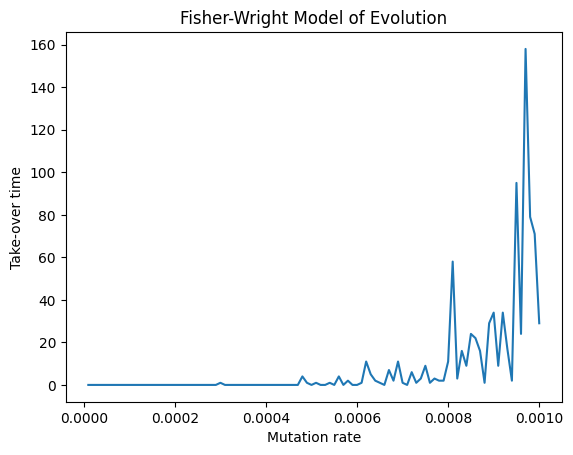

In [4]:
# Plot a graph of how the take-over time depends on the mutation rate $u=v=m$ (assuming $P=10000$ and $s=0.01$)
P = 10000
s = 0.01
generations = 10000

u_values = np.linspace(0.00001, 0.001, 100)
take_over_times = [cal_take_over_time(P, s, u, u) for u in u_values]

plt.plot(u_values, take_over_times)
plt.xlabel('Mutation rate')
plt.ylabel('Take-over time')
plt.title('Fisher-Wright Model of Evolution')
plt.show()


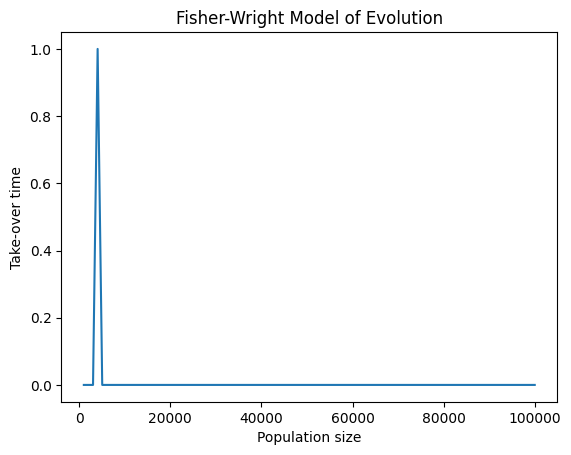

In [5]:
# Plot a graph of how the take-over time depends on the population size $P$ (assuming $s=0.01$ and $u=v=0.0001$)
def cal_take_over_time(population_size, s, u, v):
    model = FisherWright(population_size, s, u, v)
    for initial_n in range(int(population_size)):
        n_values = model.simulate(initial_n, generations)
        if n_values[-1] >= 0.95 * population_size:
            return initial_n
        
    return None
s = 0.01
u = 0.0001
v = 0.0001
generations = 10000

P_values = np.linspace(0, 100000, 100)
take_over_times = [cal_take_over_time(P, s, u, v) for P in P_values]

plt.plot(P_values, take_over_times)
plt.xlabel('Population size')
plt.ylabel('Take-over time')
plt.title('Fisher-Wright Model of Evolution')
plt.show()

## Task 2: Multiple Runs

The results from the previous question will vary from run to run.  To get a better understanding we can average over many runs.  Write a program to do this.

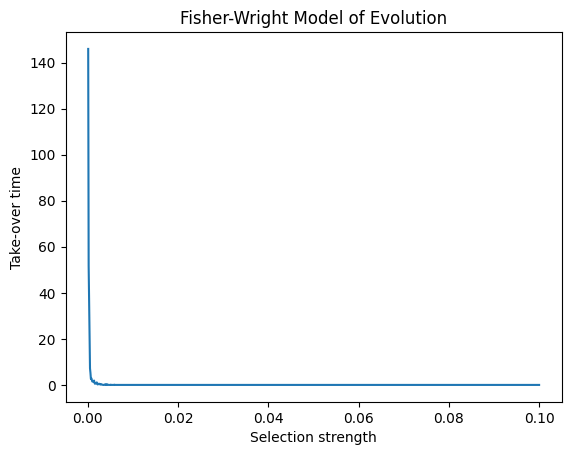

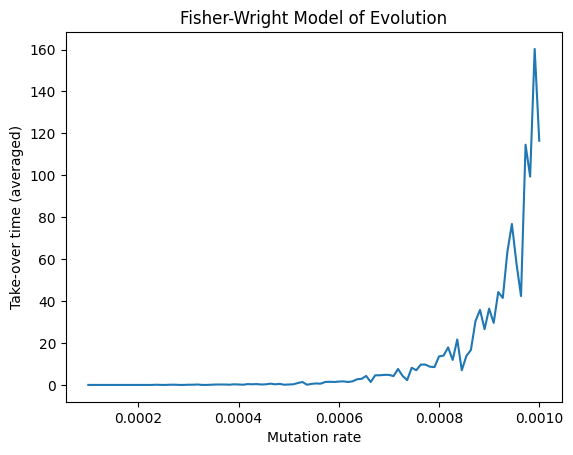

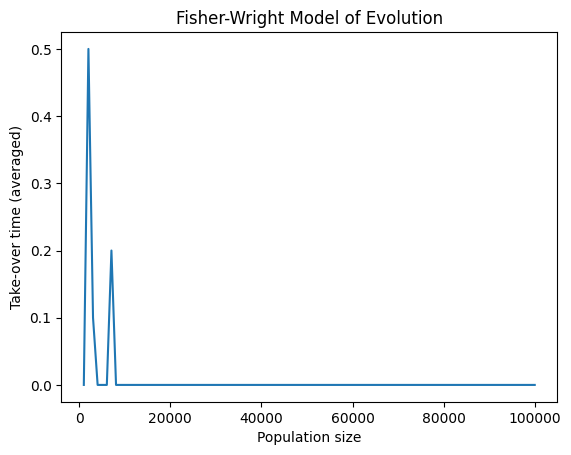

In [6]:
def cal_take_over_time(population_size, s, u, v, runs):
    total_take_over_time = 0
    successful_runs = 0
    
    for run in range(runs):
        model = FisherWright(population_size, s, u, v)
        for initial_n in range(int(population_size)):
            n_values = model.simulate(initial_n, generations)
            if n_values[-1] >= 0.95 * population_size:
                total_take_over_time += initial_n
                successful_runs += 1
                break
                
    if successful_runs == 0:
        return None
        
    return total_take_over_time / successful_runs

runs = 10  # Number of runs to average over
population_size = 10000
u = 0.0001
v = 0.0001
generations = 10000
 
s_values = np.linspace(0.0001, 0.1, 1000)
take_over_times = [cal_take_over_time(population_size, s, u, v,runs) for s in s_values]

plt.plot(s_values, take_over_times)
plt.xlabel('Selection strength')
plt.ylabel('Take-over time')
plt.title('Fisher-Wright Model of Evolution')
plt.show()

# Take-over time vs mutation rate
s = 0.01
P = 10000
generations = 10000
u_values = np.linspace(0.0001, 0.001, 100)
take_over_times = [cal_take_over_time(P, s, u, u, runs) for u in u_values]

plt.plot(u_values, take_over_times)
plt.xlabel('Mutation rate')
plt.ylabel('Take-over time (averaged)')
plt.title('Fisher-Wright Model of Evolution')
plt.show()

# Take-over time vs population size
u = 0.0001
v = 0.0001
generations = 10000
P_values = np.linspace(0, 100000, 100)
take_over_times = [cal_take_over_time(P, s, u, v, runs) for P in P_values]

plt.plot(P_values, take_over_times)
plt.xlabel('Population size')
plt.ylabel('Take-over time (averaged)')
plt.title('Fisher-Wright Model of Evolution')
plt.show()

## Task 3: Markov Model

We can make a Markov model that describes the probability, $p(t,n)$, of there being $n$ individuals in generation $t$.  We can represent this probability as a vector $\mathbf{p}(t)$ where the $n^{th}$ elements represents $p(t,n)$.  We can build a transition matrix $\mathbf{W}$ where the element $W_{n',n}$ is the probability of the number of individuals with trait $B$ changing from $n$ to $n'$ in one geneation.  In this case we can compute the evolution using 
$$ \mathbf{p}(t+1) = \mathbf{W} \, \mathbf{p}(t). $$
Write a matrix to compute $\mathbf{W}$ for a population of size $P$ a selection strength $s$, and mutation rates $u$ and $v$.

### Questions

1. Show that columns all sum to 1 (A population with $n$ individuals of type $B$ will evolve to a population of $n'$ individuals of type $B$ for some $n'$)
    - Check for different parameters
    
2. Starting from $p(t,0)=1$ compute the evolution of $\mathbf{p}(t)$ and show a graph of the mean number of individuals.  Compare this to multiEvolution.
    - Show that as we use more copies in multiEvolution we get closer to the Markov result
    
3. Plot $\mathbf{p}(100)$ and compare this with a histogram from multiEvolution.
    - Show that this is true for both short and long times.

In [7]:
import numpy as np

def transition_matrix(P, s, u, v):
    W = np.zeros((P+1, P+1))
    
    for n in range(P+1):
        ps = (1 + s) * n / (P + s * n)
        psm = (1 - v) * ps + u * (1 - ps)
        
        for n_prime in range(P+1):
            W[n_prime, n] = np.random.binomial(P, psm, size=1)[0]
            
    # Normalize the columns
    W /= W.sum(axis=0)
    
    return W

P = 10000
s = 0.01
u = v = 0.0001

W = transition_matrix(P, s, u, v)
# print("Transition matrix W:\n", W)

# Check if columns sum to 1
print("Columns sum to 1:", np.allclose(W.sum(axis=0), 1))

P = 1000
s = 0.01
u= v = 0.001
W = transition_matrix(P, s, u, v)
# print("Transition matrix W:\n", W)
print("Columns sum to 1:", np.allclose(W.sum(axis=0), 1))

Columns sum to 1: True
Columns sum to 1: True


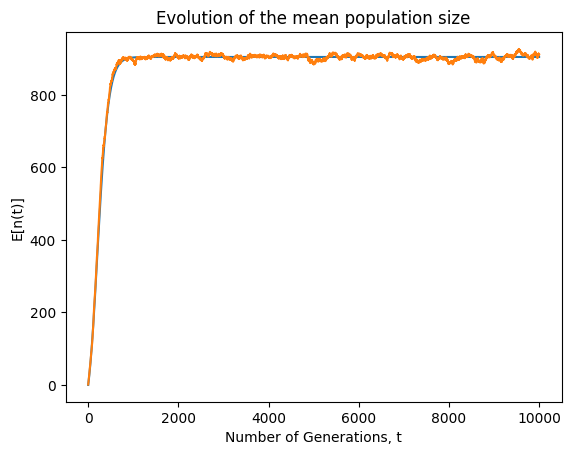

In [9]:
from scipy.stats import binom
def evolution(model, n0, T, transform=lambda x: x):
    """Run the model for T generations starting from n0
        transform the output of the model with default of doing nothing"""
    it = model(n0)                # create a new iterator
    return [(i, transform(next(it))) for i in range(T)]
no_runs = 100

def transition_matrix(P, s, u, v):
    n = np.arange(0,P+1)
    ps = (1+s)*n/(P+n*s)
    p = (1-v)*ps + u*(1-ps)
    return np.array([binom.pmf(nn, P, p) for nn in n])

class MarkovChain():
    """Markov Chain Model for simulating the Fisher Wright Model"""
    
    def __init__(self, P, s, u, v):
        self.W = transition_matrix(P, s, u, v)
        self.n = range(P+1)
        self.P = P
        
    def __iter__(self):
        p = np.array(self.p0)
        yield p
        while True:
            p = self.W@p
            yield p
            
    def mean(self, p):
        return self.n@p
    
    def __call__(self, n):
        self.p0 = np.zeros(self.P+1)
        self.p0[n] = 1
        return iter(self)

T = 10000
P = 1000
s = 0.01
u = v = 0.001

fisherWright = FisherWright(P, s, u, v)


markovChain = MarkovChain(P, s, u, v)
evoMarkov = evolution(markovChain, 0, T, markovChain.mean)

multievo = evolution(fisherWright, np.zeros(no_runs), T, np.mean)

plt.plot(*zip(*evoMarkov), *zip(*multievo))
plt.xlabel("Number of Generations, t")
plt.ylabel("E[n(t)]")
plt.title("Evolution of the mean population size")
plt.show()

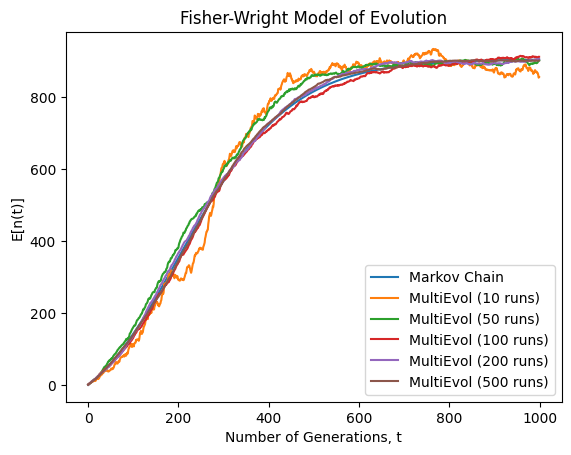

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulations(num_runs):
    # Simulate multiple runs and average the results
    multievo_results = []
    for _ in range(num_runs):
        run_result = evolution(fisherWright, 0, T)
        multievo_results.append(run_result)
    multievo_avg = np.mean(multievo_results, axis=0)
    
    return multievo_avg

T = 1000
P = 1000
s = 0.01
u = v = 0.001

fisherWright = FisherWright(P, s, u, v)
markovChain = MarkovChain(P, s, u, v)

evoMarkov = evolution(markovChain, 0, T, markovChain.mean)

runs_list = [10, 50, 100, 200, 500]

# Run simulations for different numbers of runs
multiEvol_results = {}
for num_runs in runs_list:
    multiEvol_results[num_runs] = run_simulations(num_runs)

# Plot the results
plt.plot(*zip(*evoMarkov), label="Markov Chain")

for num_runs, result in multiEvol_results.items():
    plt.plot(*zip(*result), label=f"MultiEvol ({num_runs} runs)")

plt.xlabel("Number of Generations, t")
plt.ylabel("E[n(t)]")
plt.title("Fisher-Wright Model of Evolution")
plt.legend()
plt.show()


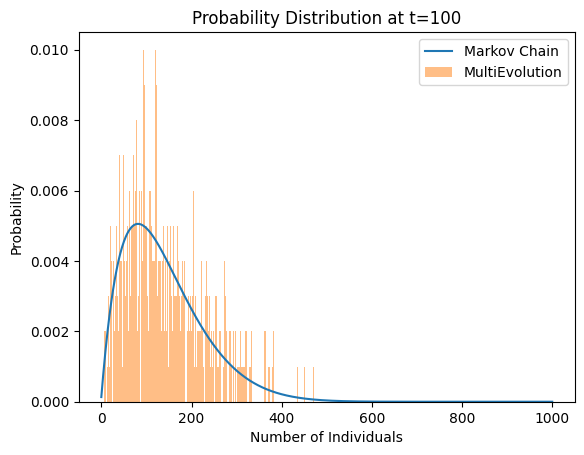

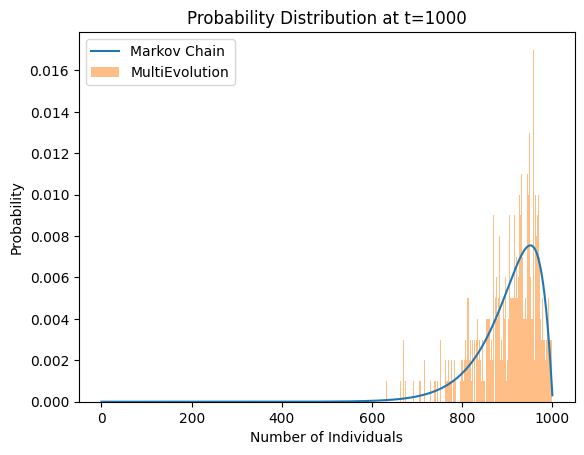

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulations(num_runs, target_time):
    multievo_distributions = []
    for _ in range(num_runs):
        run_result = evolution(fisherWright, 0, target_time + 1)
        # Find the result with the matching time step
        target_result = [result for result in run_result if result[0] == target_time][0]
        multievo_distributions.append(target_result[1])
    return multievo_distributions

T = 1000
P = 1000
s = 0.01
u = v = 0.001

fisherWright = FisherWright(P, s, u, v)
markovChain = MarkovChain(P, s, u, v)

num_runs = 1000
target_times = [100, 1000]

markov_p_t = {}
for target_time in target_times:
    evoMarkov = evolution(markovChain, 0, target_time)
    markov_p_t[target_time] = evoMarkov[-1][1]

multiEvol_histograms = {}
for target_time in target_times:
    multiEvol_histograms[target_time] = run_simulations(num_runs, target_time)

for target_time in target_times:
    plt.figure()
    plt.plot(markovChain.n, markov_p_t[target_time], label="Markov Chain")
    plt.hist(multiEvol_histograms[target_time], bins=range(P + 1), density=True, alpha=0.5, label="MultiEvolution")
    
    plt.xlabel("Number of Individuals")
    plt.ylabel("Probability")
    plt.title(f"Probability Distribution at t={target_time}")
    plt.legend()

plt.show()


## Task 4: Computing the Fixed Point Distribution

The distribution eventually reaches a fixed point, $\mathbf{p}(\infty)$, for any starting distribution (under mild conditions such as non-zero mutation rates).  We can get a very good approximation by running the Markov analysis long enough (or running a simulation for long enough).  Note that although we call it a fixed-point or equilibrium the number of individuals of type $B$ will continuously fluctuate over time.  The relative fluctuation will be smaller in a larger population (i.e. $n(t)/P$ will closer to its expected value $\mathbb{E}[n(t)]/P = p(\infty,n)$.

We have an exact solution to the dynamics in terms of the Markov model, but it involves a $(P+1)\times(P+1)$ transition matrix which gets difficult to work with when $P$ becomes large.  We can simulate a population which is much more practical for large $P$, but we need to run many simulations if we want to compute the average dynamics or a distribution.  Instead we can use the diffusion model which provides a very good approximation for large populations.

In the diffusion model we set up a stochastic differential equation describing the evolution.  Let $X(t)$ be a random variable describing the proportion of individuals with trait $B$ in the population at time $t$.  In the diffusion approximation we approximate the dynamics by a *stochastic differential equation*
$$ \mathrm{d} X(t) = a(X(t))\, \mathrm{d} t + b(X(t)) \, \mathrm{d} W(t) $$
where $a(X(t))$ describes the expected change in $X(t)$ in a short time $\mathrm{d} t$.  That is,
$$ a(X(t))\,\mathrm{d}t = \mathbb{E}\left[ \strut X(t+\mathrm{d}t) - X(t) \right] = (p_{sm}(X(t)) - X(t))\,\mathrm{d}t  $$
and $b(X(t))$ describes the fluctuation around this mean. That is,
$$ b^2(X(t))\,\mathrm{d} t = \mathbb{E}\left[ \strut \left(X(t+\mathrm{d}t) - X(t)\right)^2 \right] - \mathbb{E}\left[ \strut X(t+\mathrm{d}t) - X(t) \right]^2 = \frac{p_{sm}(X(t))\,(1-p_{sm}(X(t)))\,\mathrm{d}t}{P} $$
The quantity $W(t)$ is known as a Weiner variable it has the property that $W(t)-W(t')$ is normally distributed with mean 0 and variance $t-t'$.  The stochastic differential equation is a weird mathematical object.  But the distribution $f(t,x)$ describing the probability of $X(t)$ satisfies the Kolmogorov forward equation
$$ \frac{\partial f(t,x)}{\partial t} = - \frac{\partial\, a(x)\,f(t,x)}{\partial x} + \frac{1}{2} \frac{\partial^2 b^2(x)\, f(t,x)}{\partial x^2}.$$
This is still pretty horrible as partial differential equations are a slight pain to solve (but it can be done).  However, to find the fixed point distribution we look for a solution where
$$ \frac{\partial f(t,x)}{\partial t} = 0. $$
In this case we find
$$ f(\infty, x) \propto \frac{1}{b^2(x)} \exp\!\left( 2 \int_{1/2}^x \frac{a(y)}{b^2(y)} \mathrm{d} y \right). $$
This is relatively easy to compute, although it is a bit of a pain to do all the integrations.

**Question**

1. Write code to compute the steady state distribution and compare it to a Markov Chain model run for sufficiently long time

In [14]:
from scipy.integrate import quad

def get_norm(N, s, m, n):
    def integ(x):
        p_sm = get_psm(s, m, n, x)
        bs = p_sm * (1 - p_sm) / N
        a = p_sm - x
        return -2 * a / bs
    def run_once(num):
        x = num / N
        p_sm = get_psm(s, m, n, x)
        bs = p_sm * (1 - p_sm) / N
        integral, _ = quad(integ, x, 0.5)
        return np.exp(integral) / (norm * bs)

    norm, _ = quad(run_once, 0, N)
    return norm

def steady_state_diffusion(N, s, m, n):
    x = 0  # initial number of mutants
    norm = get_norm(N, s, m, n)
    ints = []

    def integ(x):
        p_sm = get_psm(s, m, n, x)
        bs = p_sm * (1 - p_sm) / N
        a = p_sm - x
        return -2 * a / bs

    for num in range(N):
        x = num / N
        p_sm = get_psm(s, m, n, x)
        bs = p_sm * (1 - p_sm) / N
        integral, _ = quad(integ, x, 0.5)
        ints.append(np.exp(integral) / (norm * bs))

    return ints


    
def get_psm(s, m, n, x):
    """Calculates p_sm"""
    ps = (1+s)*x/(1+s*x)
    return ps*(1-n) + m*(1-ps)


# Compute the steady-state distribution using the diffusion model
diffusion_steady_state = steady_state_diffusion(P, s, u, v)

# Compute the stationary distribution using the Markov Chain model
mc = MarkovChain(P, s, u, v)
stationary_distribution_mc = mc.get_stationary_distribution()

# Plot the results
x_values = np.arange(P + 1) / P
plt.plot(x_values, diffusion_steady_state, label="Diffusion Model", linestyle='-')
plt.plot(x_values, stationary_distribution_mc, label="Markov Chain", linestyle='--')
plt.xlabel("Proportion of individuals with trait B")
plt.ylabel("Probability")
plt.legend()
plt.show()

NameError: free variable 'norm' referenced before assignment in enclosing scope

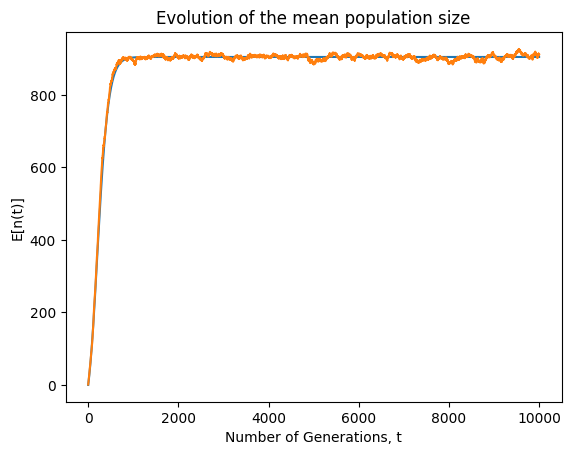

In [ ]:
from scipy.stats import binom
def evolution(model, n0, T, transform=lambda x: x):
    """Run the model for T generations starting from n0
        transform the output of the model with default of doing nothing"""
    it = model(n0)                # create a new iterator
    return [(i, transform(next(it))) for i in range(T)]
no_runs = 100

def transition_matrix(P, s, u, v):
    n = np.arange(0,P+1)
    ps = (1+s)*n/(P+n*s)
    p = (1-v)*ps + u*(1-ps)
    return np.array([binom.pmf(nn, P, p) for nn in n])

class MarkovChain():
    """Markov Chain Model for simulating the Fisher Wright Model"""
    
    def __init__(self, P, s, u, v):
        self.W = transition_matrix(P, s, u, v)
        self.n = range(P+1)
        self.P = P
        
    def __iter__(self):
        p = np.array(self.p0)
        yield p
        while True:
            p = self.W@p
            yield p
            
    def mean(self, p):
        return self.n@p
    
    def __call__(self, n):
        self.p0 = np.zeros(self.P+1)
        self.p0[n] = 1
        return iter(self)

T = 10000
P = 1000
s = 0.01
u = v = 0.001

fisherWright = FisherWright(P, s, u, v)


markovChain = MarkovChain(P, s, u, v)
evoMarkov = evolution(markovChain, 0, T, markovChain.mean)

multievo = evolution(fisherWright, np.zeros(no_runs), T, np.mean)

plt.plot(*zip(*evoMarkov), *zip(*multievo))
plt.xlabel("Number of Generations, t")
plt.ylabel("E[n(t)]")
plt.title("Evolution of the mean population size")
plt.show()

**Weak Selection and Mutation Approximation**

It gets even easier if we assume the mutation and selection rates are small (this is a good assumption in biology).  In this case
$$  f(\infty, x) \propto \frac{1}{N(P,s,u,v)} x^{2\,P\,u-1} \, (1-x)^{2\,P\,v-1} \, \mathrm{e}^{2\,P\,s\,x}.$$
where $N(P,s,u,v) = B(2\,P\,u, 2\,P\,v) \, {}_1F_1(2\,P\,u, 2\,P\,(u+v), 2\,P\,s\,x)$ where $B$ is the beta function and ${}_1F_1$ is a hypergeometric function. You can just normalise this by integrating (or summing) over the $x\in[0,1]$,

**Question**
1. Write a program to generate the distribution and compare to Markov model
2. Show that this is a poor approximation for strong selection of mutation rates.

## Task 5: Multigene Evolution

Up to now we have considered the evolution of a single trait in isolation from any other genes.  Obviously in real evolution the genome will contain many genes that code for different traits.  Here we want to show that if we have sufficient sexual recombination the Fisher-Wright model still provides a good approximation for the evolution.  Here we model the genome as a series of $L$ sites (each site represents a gene which will be on a different section of the DNA.  At each site we assume that the gene can be in one of two states.  The original state and the mutant state.  Again we assume that for two individuals that differ at one site the one the differs by having an extra mutation will be fitter by a factor $1+s$.  That is, the fitness (the relative number of offspring) will be proportional to $(1+s)^F$ where $F$ is the number of mutants in the string.  To simulate this consider a populations of $P$ binary strings of length $L$.  A 0 at a site denotes that gene is in the original state while a 1 represents the gene being in a mutant state.  Initially we assume all strings are in the original state (all zeros).  The evolution happens in generations according to
1. We consider $P$ mating events where two parents are selected with probability
$$p_i = \frac{(1+s)^{F_i}}{\sum_{j=1}^P (1+s)^{F_j}} $$
where $F_i$ is the number of ones in individual $i$
2. For each pair we generate a child by at each site choosing the gene value from one parent or the other uniformly at random
3. We then mutate each child by flipping the gene at each site with a probability of $u$ of flipping from 0 to 1 and a probability of $v$ of flipping from 1 to 0.  For simplicity we can assume $v=u$.

Below I provide a class that simulates selection, mutation and recombination

**Question**
1. Write a program to simulate sexual evolution of the population
    - Compare the mean number of mutant traits at each site with the Markov chain model
    - Compare the distribution of mutant traits across the differ sites with that for a Markov chain

In [62]:
import numpy as np

class Population:
    def __init__(self, P, L, s, u):
        self.P = P
        self.L = L
        self.s = s
        self.u = u
        self.population = np.zeros((P, L), dtype=int)

    def fitness(self, individual):
        F = np.sum(individual)
        return (1 + self.s) ** F

    def select_parents(self):
        fitnesses = np.array([self.fitness(individual) for individual in self.population])
        probabilities = fitnesses / np.sum(fitnesses)
        parents_indices = np.random.choice(np.arange(self.P), size=(self.P, 2), p=probabilities)
        return self.population[parents_indices]

    def recombine(self, parents):
        mask = np.random.randint(0, 2, size=(self.P, self.L))
        child_population = np.where(mask, parents[:, 0], parents[:, 1])
        return child_population

    def mutate(self, population):
        mutation_mask = np.random.uniform(size=(self.P, self.L)) < self.u
        return np.logical_xor(population, mutation_mask).astype(int)

    def evolve(self):
        parents = self.select_parents()
        children = self.recombine(parents)
        mutated_children = self.mutate(children)
        self.population = mutated_children

    def mean_mutant_traits(self):
        return np.mean(np.sum(self.population, axis=1))

    def trait_distribution(self):
        return np.sum(self.population, axis=0)

#  Compare the mean number of mutant traits at each site with the Markov chain model
P = 1000
L = 1000
s = 0.01
u = 0.001
v = 0.001
T = 10000

population = Population(P, L, s, u)
evo = evolution(population.evolve, 0, T, population.mean_mutant_traits)

markovChain = MarkovChain(P, s, u, v)
evoMarkov = evolution(markovChain, 0, T, markovChain.mean)

plt.plot(*zip(*evoMarkov), *zip(*evo))
plt.xlabel("Number of Generations, t")
plt.ylabel("E[n(t)]")
plt.title("Evolution of the mean number of mutant traits")
plt.show()


TypeError: Population.evolve() takes 1 positional argument but 2 were given

**Asexual Populations**

1. Write code to simulate the evolution of an asexual population (you have to replace recombine with selection)
    - Show that the asexual population is poorly approximated by the Fisher Wright model